### 종교 유무에따른 이혼율 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': "8, 6"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

pd.set_option('display.max_rows', 100)     # 행은 최대 100까지 출력
pd.set_option('display.max_columns', None) # 열은 무제한 출력

raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav');
print(type(raw))

# 1~17차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h17_g3'     : 'gender',         #  성별, 1: 남, 2: 여
         'h17_g4'     : 'birth',          #  태어난 연도
         'h17_g10'    : 'marriage_type',  #  혼인 상태
         'h17_g11'    : 'religion',       #  종교, 1: 있음, 2: 없음
         'p1702_8aq1' : 'income',         #  일한달의 월 평균 임금 
         'h17_eco9'   : 'code_job',       #  직업 코드
         'h17_reg7'   : 'code_region'})   #  7개 권역별 지역구분

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 직종 코드 확인
# list_job=pd.read_excel('./Koweps_Codebook_2022.xlsx', sheet_name='직종코드')
# print(type(list_job))
# print(list_job.head(5))

# 직종의 merge
# raw=raw.merge(list_job, how='left', on='code_job')
# raw[['code_job', 'job']].head(5)

# 성별 변경
# raw['gender'] = np.where(raw['gender'] == 1, 'male', 'female')
# raw['gender'].head(3)

In [4]:
df = raw.copy()
print(df['religion'].dtypes)
print(df['religion'].head(5))
print(df['religion'].value_counts())

float64
0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: religion, dtype: float64
religion
2.0    9170
1.0    7421
Name: count, dtype: int64


In [5]:
df['religion'] = np.where(df['religion'] == 1, 'yes', 'no')
print(df['religion'].head(5))

0    yes
1     no
2    yes
3    yes
4    yes
Name: religion, dtype: object


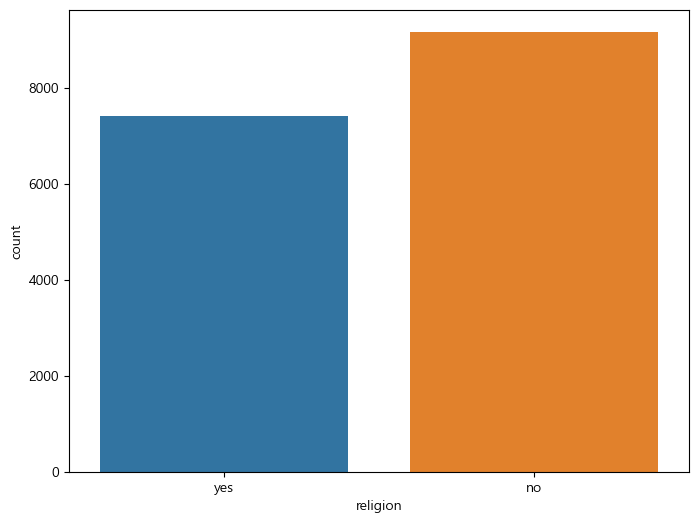

In [7]:
sns.countplot(data=df, x='religion');

In [9]:
print(df['marriage_type'].dtype)
print(df['marriage_type'].value_counts())
# 0.비해당(18세 미만)
# 1.유배우         2.사별         3.이혼          4.별거          
# 5.미혼(18세이상, 미혼모 포함)   6.기타(사망 등)

float64
marriage_type
1.0    8500
5.0    2654
2.0    2411
0.0    2017
3.0     893
4.0      86
6.0      30
Name: count, dtype: int64


In [10]:
def marriage(x):
  sw=''
  if x==1:
    sw='marriage'
  elif x==3:
    sw='divorce'
  else:
    sw='etc'    
    
  return sw

# marriage 컬럼의 값이 각각 marriage 함수의 x로 전달되어 처리됨
df['marriage'] = df['marriage_type'].apply(marriage)   
df[['marriage_type', 'marriage']].head(3)   

,marriage_type,marriage
0,2.0,etc
1,2.0,etc
2,3.0,divorce


In [14]:
# 결혼 유무에따른 빈도 분석
df_marriage = df.groupby(['marriage'], as_index=False).agg(n=('marriage', 'count'))
df_marriage

,marriage,n
0,divorce,893
1,etc,7198
2,marriage,8500


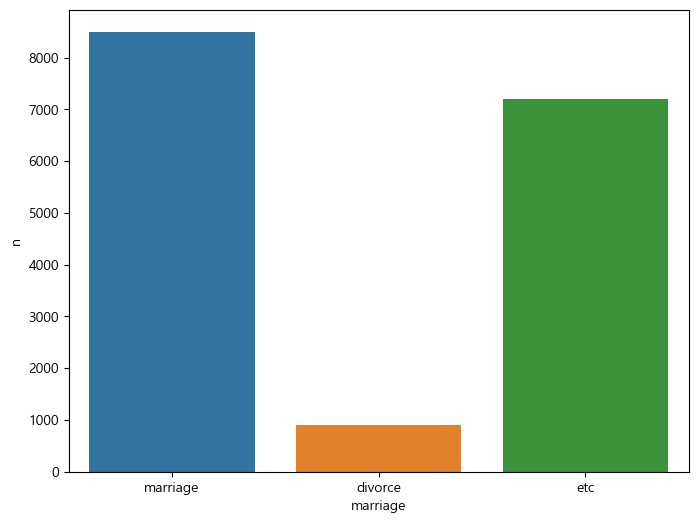

In [16]:
sns.barplot(data=df_marriage, x='marriage', y='n', order=['marriage', 'divorce', 'etc']);

In [19]:
df_marriage

,marriage,n
0,divorce,893
1,etc,7198
2,marriage,8500


In [21]:
df2 = df[['religion', 'marriage']]
df2.head(10)

,religion,marriage
0,yes,etc
1,no,etc
2,yes,divorce
3,yes,marriage
4,yes,marriage
5,yes,etc
6,yes,marriage
7,yes,marriage
8,yes,etc
9,yes,divorce


In [38]:
df2 = df2.query('marriage != "etc"')
df2.head(10)

,religion,marriage
2,yes,divorce
3,yes,marriage
4,yes,marriage
6,yes,marriage
7,yes,marriage
9,yes,divorce
11,no,marriage
12,no,marriage
14,no,marriage
15,no,marriage


In [23]:
df2['marriage'].value_counts()

marriage
marriage    8500
divorce      893
Name: count, dtype: int64

In [24]:
df2.shape

(9393, 2)

In [26]:
# 종교 유무에 따른 이혼율
df3 = df2.groupby(['religion'], as_index=False).agg(n=('religion' ,'count'))
df3

,religion,n
0,no,4985
1,yes,4408


In [28]:
df3 = df2.groupby(['religion', 'marriage'], as_index=False).agg(n=('religion', 'count'))
df3

,religion,marriage,n
0,no,divorce,504
1,no,marriage,4481
2,yes,divorce,389
3,yes,marriage,4019


In [32]:
# !pip show pandas

In [39]:
# pandas 1.4 later 권장 ★
# religion 컬럼으로 그룹화를하고 marriage 컬럼의 갯수에 대한 비율
df4=df2.groupby(['religion'], as_index=False)['marriage'].value_counts(normalize=True)
df4

,religion,marriage,proportion
0,no,marriage,0.898897
1,no,divorce,0.101103
2,yes,marriage,0.911751
3,yes,divorce,0.088249


In [44]:
# 이혼만 추출
df5=df4.query('marriage=="divorce"')
df5

,religion,marriage,proportion
1,no,divorce,0.101103
3,yes,divorce,0.088249


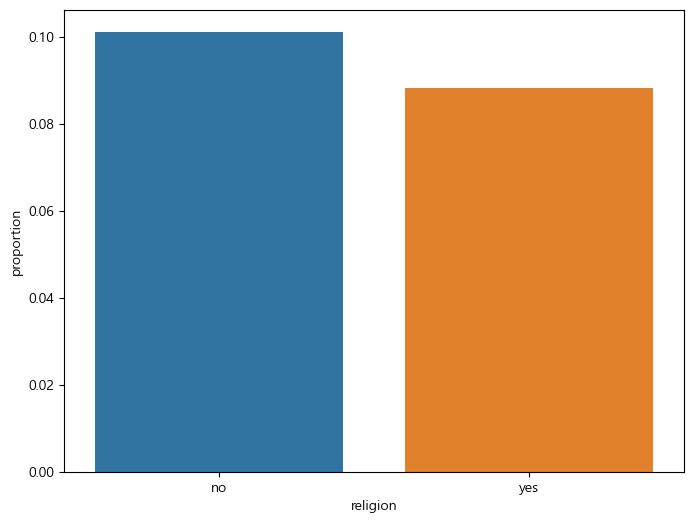

In [45]:
sns.barplot(data=df5, x='religion', y='proportion');

In [46]:
df5['proportion'] = df5['proportion'] * 100
df5

,religion,marriage,proportion
1,no,divorce,10.110331
3,yes,divorce,8.824864


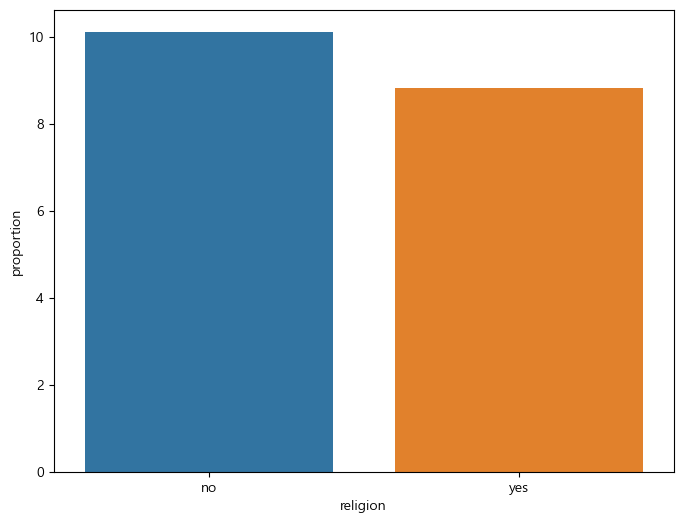

In [47]:
sns.barplot(data=df5, x='religion', y='proportion');
# 종교가 있는 사람들이 이혼을 덜한다.